Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [2]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]             )

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - val_loss: 0.6925
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6924 - val_l

235/235 [==============================] - 2s 8ms/step - loss: 0.6841 - val_loss: 0.6839
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6839 - val_loss: 0.6837
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6837 - val_loss: 0.6835
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6835 - val_loss: 0.6832
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6832 - val_loss: 0.6830
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6830 - val_loss: 0.6828
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6827 - val_loss: 0.6825
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6825 - val_loss: 0.6822
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6822 - val_loss: 0.6819
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6819 - val_loss: 

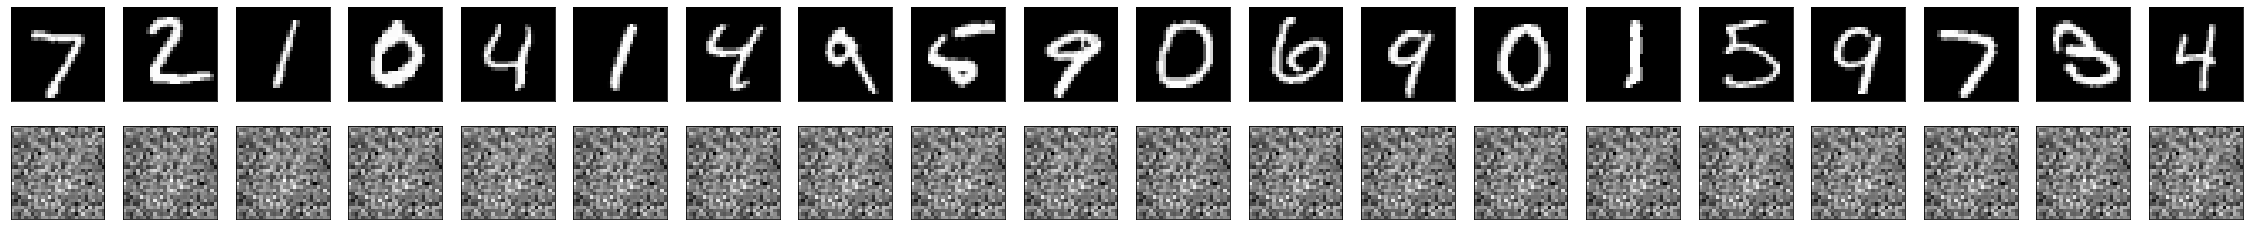

In [5]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
np.max(encoded_imgs)

3.8235993

In [8]:
encoded_imgs

array([[1.9126431 , 0.        , 0.        , 0.1290891 ],
       [1.173318  , 0.20007308, 0.        , 0.        ],
       [0.8980106 , 0.        , 0.        , 0.        ],
       ...,
       [1.8954126 , 0.        , 0.        , 0.2913693 ],
       [1.9869481 , 0.        , 0.        , 0.28368074],
       [2.3492565 , 0.        , 0.        , 0.3278187 ]], dtype=float32)

In [9]:
%matplotlib inline

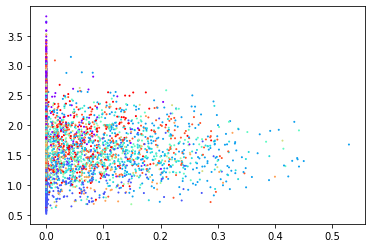

In [10]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

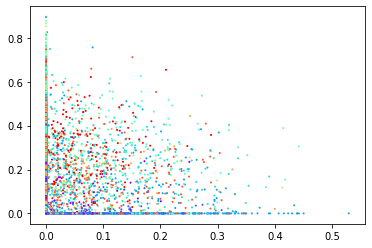

In [11]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

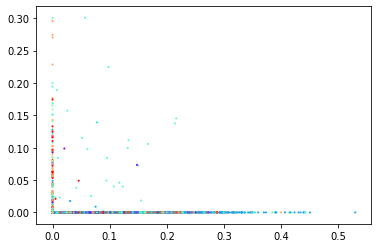

In [12]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
plt.show()

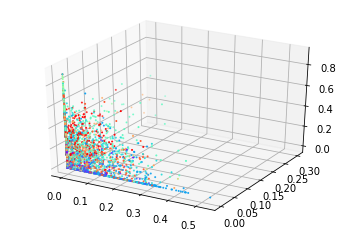

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment
1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot
2. using the previous assignment's model of detecting images, how does the accuracy change when you run the digit-prediction model on these 'decoded' values?
3. apply noise to *_only_* the input of the autoencoder (not the output). demonstrate that your autoencoder can strip out noise.

In [ ]:
#1

In [15]:
encoding_dim = 2
#encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [16]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_lo

235/235 [==============================] - 2s 9ms/step - loss: 0.6878 - val_loss: 0.6877
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6877 - val_loss: 0.6876
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6876 - val_loss: 0.6876
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6875 - val_loss: 0.6875
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6875 - val_loss: 0.6874
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6874 - val_loss: 0.6873
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6873 - val_loss: 0.6872
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6872 - val_loss: 0.6871
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6871 - val_loss: 0.6870
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6870 - val_loss: 

In [22]:
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [23]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_l

235/235 [==============================] - 2s 8ms/step - loss: 0.6873 - val_loss: 0.6872
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6872 - val_loss: 0.6871
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6871 - val_loss: 0.6870
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6870 - val_loss: 0.6869
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6869 - val_loss: 0.6868
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6867 - val_loss: 0.6867
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6866 - val_loss: 0.6865
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6865 - val_loss: 0.6864
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6864 - val_loss: 0.6863
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6863 - val_loss: 

In [25]:
encoding_dim = 6 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - val_lo

235/235 [==============================] - 2s 9ms/step - loss: 0.6873 - val_loss: 0.6872
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6872 - val_loss: 0.6871
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6871 - val_loss: 0.6871
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6870 - val_loss: 0.6870
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6869 - val_loss: 0.6869
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6868 - val_loss: 0.6868
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6867 - val_loss: 0.6867
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6866 - val_loss: 0.6866
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6865 - val_loss: 0.6865
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6865 - val_loss: 

In [28]:
encoding_dim = 8 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6922 - val_l

235/235 [==============================] - 2s 8ms/step - loss: 0.6839 - val_loss: 0.6836
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6836 - val_loss: 0.6834
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6834 - val_loss: 0.6831
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6831 - val_loss: 0.6828
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6828 - val_loss: 0.6825
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6825 - val_loss: 0.6823
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6822 - val_loss: 0.6819
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6819 - val_loss: 0.6816
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6816 - val_loss: 0.6813
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6813 - val_loss: 

In [27]:
encoding_dim = 10 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6924 - val_lo

235/235 [==============================] - 2s 8ms/step - loss: 0.6798 - val_loss: 0.6793
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6793 - val_loss: 0.6788
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6788 - val_loss: 0.6783
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6783 - val_loss: 0.6778
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6778 - val_loss: 0.6772
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6772 - val_loss: 0.6766
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6766 - val_loss: 0.6759
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6760 - val_loss: 0.6753
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6753 - val_loss: 0.6745
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6746 - val_loss: 

In [29]:
encoding_dim = 12 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6923 - val_loss: 0.6923
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6922 - val_lo

235/235 [==============================] - 2s 8ms/step - loss: 0.6840 - val_loss: 0.6839
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6838 - val_loss: 0.6836
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6836 - val_loss: 0.6834
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6833 - val_loss: 0.6832
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6831 - val_loss: 0.6829
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6828 - val_loss: 0.6827
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6826 - val_loss: 0.6824
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6823 - val_loss: 0.6821
Epoch 89/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6820 - val_loss: 0.6818
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6818 - val_loss: 

In [30]:
encoding_dim = 14 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6928
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_lo

235/235 [==============================] - 2s 9ms/step - loss: 0.6848 - val_loss: 0.6846
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6846 - val_loss: 0.6844
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6844 - val_loss: 0.6842
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6842 - val_loss: 0.6839
Epoch 85/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6839 - val_loss: 0.6837
Epoch 86/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6837 - val_loss: 0.6834
Epoch 87/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6834 - val_loss: 0.6832
Epoch 88/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6832 - val_loss: 0.6829
Epoch 89/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6829 - val_loss: 0.6826
Epoch 90/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6826 - val_loss: 

NameError: name 'history' is not defined

In [31]:
encoding_dim = 16 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )

Epoch 1/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6926
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - val_lo

235/235 [==============================] - 2s 8ms/step - loss: 0.6855 - val_loss: 0.6854
Epoch 82/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6854 - val_loss: 0.6853
Epoch 83/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6852 - val_loss: 0.6851
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6851 - val_loss: 0.6849
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6849 - val_loss: 0.6848
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6848 - val_loss: 0.6846
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6846 - val_loss: 0.6844
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6844 - val_loss: 0.6843
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6843 - val_loss: 0.6841
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6841 - val_loss: 

In [33]:
encoding_dim = 18 

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = 'accuracy')

autoencoder.fit(xtrain, xtrain,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(xtest, xtest),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')] )



Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6929 - accuracy: 0.0013 - val_loss: 0.6928 - val_accuracy: 9.0000e-04
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - accuracy: 0.0016 - val_loss: 0.6927 - val_accuracy: 9.0000e-04
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6927 - accuracy: 0.0014 - val_loss: 0.6926 - val_accuracy: 9.0000e-04
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - accuracy: 0.0016 - val_loss: 0.6925 - val_accuracy: 9.0000e-04
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - accuracy: 0.0017 - val_loss: 0.6925 - val_accuracy: 9.0000e-04
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6925 - accuracy: 0.0015 - val_loss: 0.6924 - val_accuracy: 9.0000e-04
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6924 - accuracy: 0.0018 - val_loss: 0.692

235/235 [==============================] - 2s 8ms/step - loss: 0.6862 - accuracy: 0.0015 - val_loss: 0.6860 - val_accuracy: 0.0020
Epoch 58/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6860 - accuracy: 0.0013 - val_loss: 0.6857 - val_accuracy: 0.0020
Epoch 59/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6858 - accuracy: 0.0018 - val_loss: 0.6855 - val_accuracy: 0.0020
Epoch 60/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6856 - accuracy: 0.0014 - val_loss: 0.6853 - val_accuracy: 0.0021
Epoch 61/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6853 - accuracy: 0.0015 - val_loss: 0.6851 - val_accuracy: 0.0019
Epoch 62/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6851 - accuracy: 0.0018 - val_loss: 0.6848 - val_accuracy: 0.0019
Epoch 63/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6849 - accuracy: 0.0013 - val_loss: 0.6846 - val_accuracy: 0.0019
Epoch

In [ ]:
#TEST TEST TEST
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#2 


In [ ]:
#3

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtest = xtest + np.random.normal(0, .1, xtest.shape)
xtrain.shape, xtest.shape